### Railways FRA Data Analysis 
#### (DS 6001 - Final Pipeline)

In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
#Connect to db
conn = sqlite3.connect('fra.db')

Reading table

In [3]:
table = pd.read_sql_query("SELECT * FROM df_clean", conn)

### 1) Number of extreme accidents as a yearly time series.

In [4]:
cutoff = np.percentile(table.ACCDMG, 75)  + (np.percentile(table.ACCDMG, 75) - np.percentile(table.ACCDMG, 25))*1.5
cutoff

86358.25

In [5]:
extreme_accidents = pd.read_sql_query('select YEAR4, count(*) as total_accidents from df_clean where ACCDMG > {} group by YEAR4 order by YEAR4'.format(cutoff), conn)
extreme_accidents.head()

,YEAR4,total_accidents
0,1975,424
1,1976,543
2,1977,624
3,1978,704
4,1979,682


In [6]:
extreme_accidents.set_index('YEAR4', inplace = True)

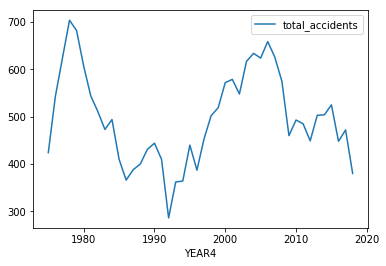

In [8]:
extreme_accidents.plot()

### 2) Cost of extreme accidents as a yearly time series.

In [11]:
extreme_costs = pd.read_sql_query('select YEAR4, sum(ACCDMG) as accidents_costs from df_clean where ACCDMG > {} group by YEAR4 order by YEAR4'.format(cutoff), conn)
extreme_costs.head()

,YEAR4,accidents_costs
0,1975,93219777
1,1976,124426600
2,1977,165692733
3,1978,169645521
4,1979,186912482


In [12]:
extreme_costs.set_index('YEAR4', inplace = True)

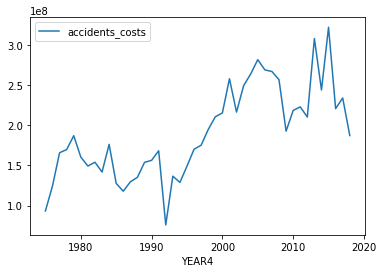

In [13]:
extreme_costs.plot()

### 3) Cost of most expensive accidents as a yearly time series.

In [14]:
max_costs = pd.read_sql_query('select YEAR4, max(ACCDMG) as accidents_costs from df_clean where ACCDMG > {} group by YEAR4 order by YEAR4'.format(cutoff), conn)
max_costs.head()

,YEAR4,accidents_costs
0,1975,2520110
1,1976,2003110
2,1977,4678640
3,1978,4003620
4,1979,2993850


In [15]:
max_costs.set_index('YEAR4', inplace = True)

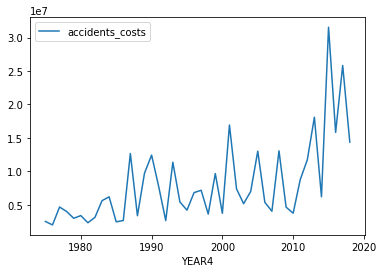

In [16]:
max_costs.plot()

In [17]:
conn.close()